# Probability, Information Theory & Statistics

*Probability & Information Theory*, introduces the mathematical fields that enable us to quantify uncertainty as well as to make predictions despite uncertainty. These fields are essential because machine learning algorithms are both trained by imperfect data and deployed into noisy, real-world scenarios they haven’t encountered before.

You’ll develop a working understanding of 

- Variables, probability distributions, metrics for assessing distributions.
- Essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms.

# Part 1: Introduction to Probability

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Surpress Futurewarnings messages due to seaborn incompatibilities
warnings.filterwarnings("ignore",category=FutureWarning)

## The Law of Large Numbers
The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability.
Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing numbers of coin tosses per experiment: 

In [2]:
# Create an array of exponentially increasing sample sizes (powers of 2)
# This allows us to observe how probability stabilizes as we increase experiments

ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]) 

# Set random seed to 42 for reproducibility - this ensures everyone gets the same "random" results
# Useful for teaching and debugging; in real analysis, you might not set a seed

np.random.seed(42)

The `binomial()` method simulates a single coin flip and returns the number of flips that are heads in an experiment.

In [4]:
# Single coin flip: 1 trial with 0.5 probability of heads
# Returns 0 (tails) or 1 (heads)

np.random.binomial(1, 0.5)

1

In [5]:
# Run experiments for each sample size: for each n in ns, flip n coins and count heads
# This creates a list where each element is the number of heads from n coin flips

heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[1, 2, 3, 6, 12, 35, 67, 128, 264, 506, 1019, 2051]

In [6]:
# Calculate the proportion (ratio) of heads for each experiment
# Dividing array by array performs element-wise division
# This shows us how close each experiment came to the expected 50% probability

proportion_heads = heads_count/ns
proportion_heads

array([0.5       , 0.5       , 0.375     , 0.375     , 0.375     ,
       0.546875  , 0.5234375 , 0.5       , 0.515625  , 0.49414062,
       0.49755859, 0.50073242])

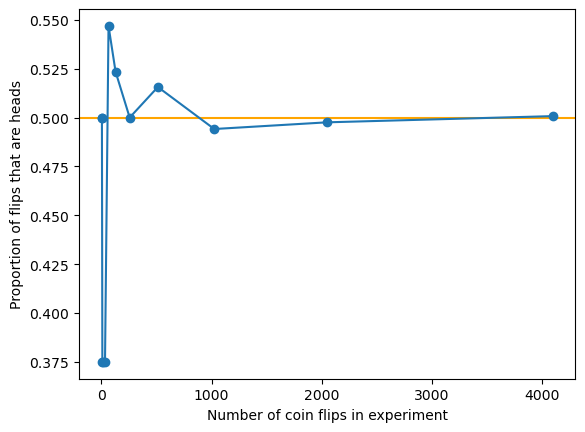

In [7]:
# Visualize the Law of Large Numbers

fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')

# Orange horizontal line shows the theoretical probability (0.5)

plt.axhline(0.5, color='orange')
_ = ax.plot(ns, proportion_heads, marker='o')

# Blue line shows our actual results
# Notice: As n increases, our results converge toward 0.5


## Expected Value

In [8]:
from math import factorial

# Calculate "n_choose_k" - the number of ways to arrange k heads in n flips
# Divide by total possible outcomes (2^n) to get probability

def coinflip_prob(n, k):
    
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    
    
    return n_choose_k/2**n


In [9]:
coinflip_prob(5, 3)

0.3125

In [10]:
# Calculate probability for all possible outcomes (0 to 5 heads) in 5 coin flips
# range(6) gives us [0, 1, 2, 3, 4, 5]
# This shows the complete probability distribution

[coinflip_prob(5, h) for h in range(6)]

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [11]:
P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

$$ \mathbb{E} = \sum_x xP(x) $$

In [12]:
# Calculate expected value: sum of (outcome × probability) for all outcomes
# Formula: E = Σ x·P(x) where x is number of heads
# For 5 coin flips, we expect E = 2.5 heads on average

E = sum([P[x]*x for x in range(6)])
E

2.5

### Measures of Central Tendency
Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.
#### Mean
The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):
$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$
Expected value is in fact the long-term *mean* of some function (i.e., $\mu = \mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to the expected value, $\mathbb{E} = 2.5$.

In [13]:
# Run 1000 experiments, each flipping 5 coins
# The third parameter tells binomial() how many experiments to run
# Returns an array of 1000 values, each representing heads count from 5 flips

n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

In [14]:
len(heads_count)

1000

In [15]:
heads_count[0:20]

array([3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2, 1, 4, 2])

In [16]:
# Calculate mean manually: sum of all values divided by count
# This is the "average" number of heads across all 1000 experiments
# Should be close to our expected value of 2.5

sum(heads_count)/len(heads_count)

2.477

Unsurprisingly, NumPy comes with a built-in function:

In [17]:
# NumPy provides two equivalent ways to calculate mean:

np.mean(heads_count)    # Function call syntax

2.477

In [18]:
heads_count.mean()      # Method call syntax (cleaner!)

2.477

Pretty close! The law of large numbers implies that as we increase the number of experiments (e.g., to a million -- you're welcome to try it), we'll converge on $\mathbb{E}=2.5$.

#### Median
The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [19]:
# Sort the array in ascending order to find the median

heads_count.sort()
heads_count[0:20]      # View first 20 values (smallest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# The median will be in the middle of this sorted array

heads_count[-20:]      # View last 20 values (largest)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [21]:
len(heads_count)

1000

With an odd number of values in a distribution, we consider the single midpoint to be the median, e.g., the midpoint of the sorted array `[2, 4, 6, 9, 10]` is six.

With an even number, we take the mean of the two values that straddle the midpoint: 

In [22]:
# With 1000 values (even number), the median is between positions 499 and 500
# Python uses 0-indexing, so position 499 is the 500th value

heads_count[499]  # Value just before midpoint

3

In [23]:
heads_count[500]  # Value just after midpoint

3

...which in this case is obviously three: 

In [24]:
# Median = average of these two values

(3+3)/2

3.0

Built-in method:

In [25]:
np.median(heads_count)

3.0

#### Mode
The **mode** is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.
As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three.

Method available in the SciPy `stats` module:

In [26]:
# scipy.stats.mode() returns a special object with mode value and count

st.mode(heads_count)      # Returns full ModeResult object

ModeResult(mode=3, count=313)

In [27]:
st.mode(heads_count)[0]   # Extract just the mode value (most frequent outcome)

3

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed: 

In [28]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew

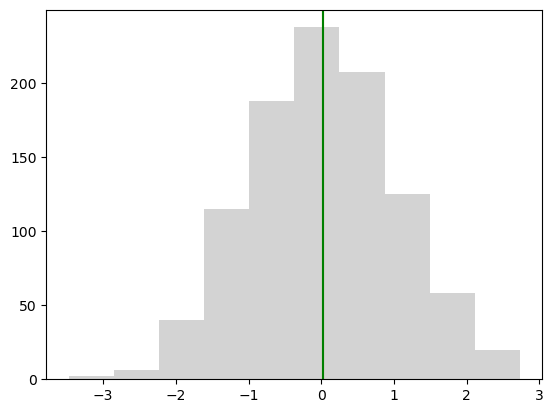

In [29]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

# Note: Mode typically only applies to PMFs; this is a PDF

Skewed distributions, in contrast, drag the mean away from the center and toward the tail: 

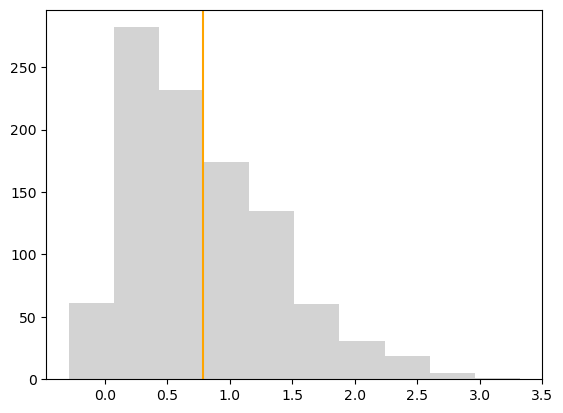

In [30]:
# Generate right-skewed data (skewness = 10)
# Positive skewness creates a long tail on the right side
# This mimics real-world data like income, where a few high values pull the mean up

x = st.skewnorm.rvs(10, size=1000) 
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

# Note: Mode typically only applies to PMFs; this is a PDF

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

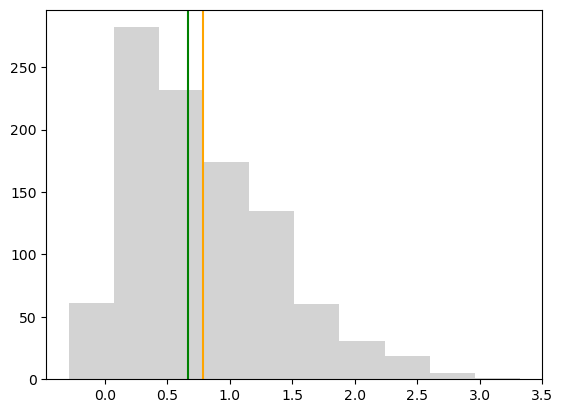

In [31]:
# Compare mean and median visually on histogram

fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')    # Orange line = mean
plt.axvline(x = np.median(x), color='green')   # Green line = median
_ = plt.hist(x, color = 'lightgray')           # Gray histogram shows distribution

# With no skew (symmetric data), mean and median overlap at the center
# Note: Mode typically only applies to discrete distributions (PMFs); this is continuous (PDF)


## Measures of Dispersion
The most widely-used methods are: 
* Variance
* Standard deviation
* Standard error

### Variance 
Denoted with $\sigma^2$ can be written using expected-value notation, but it's easier to understand without it: 
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$
As an example let's calculate the variance of the PDF `x` from earlier: 


In [32]:
# Calculate variance step-by-step to understand the concept

xbar = np.mean(x)   # Step 1: Find the mean
xbar


0.7900004404787639

In [33]:
# Step 2: For each value, calculate squared difference from mean
# Squaring ensures all differences are positive and amplifies large deviations

squared_differences = [(x_i - xbar)**2 for x_i in x]
squared_differences[0:10]


[0.22823235176924125,
 0.012115270341729887,
 0.20846536926637985,
 0.01996500251646268,
 0.1971701538110089,
 0.5972610205530066,
 0.16845832721725823,
 0.04806532405319897,
 0.7295642830556377,
 0.4987350981846458]

In [34]:
# Step 3: Average the squared differences to get variance
# Variance measures how spread out the data is from the mean

sigma_squared = sum(squared_differences)/len(x)
sigma_squared


0.3525825002425043

Of course there's a built-in NumPy method: 


In [35]:
np.var(x)

0.3525825002425043

### Standard Deviation
A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$


In [36]:
# Standard deviation is the square root of variance
# This brings the measure back to the original units of our data
# Makes it easier to interpret: "most data falls within 1 standard deviation of the mean"

sigma = sigma_squared**(1/2)    # Equivalent to sqrt(sigma_squared)
sigma


0.5937865780248862

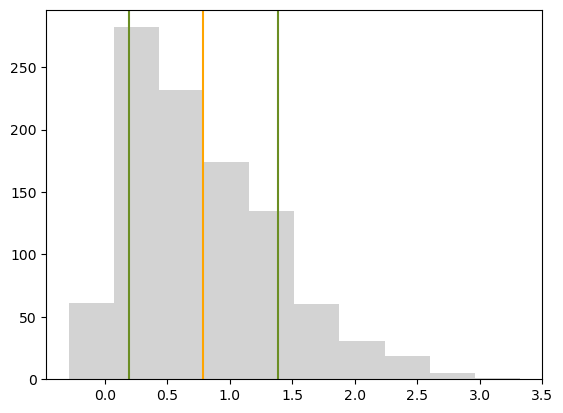

In [37]:
np.std(x)

# Visualize mean and standard deviation on the distribution

fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')           # Orange = mean (center)
plt.axvline(x = xbar+sigma, color='olivedrab')  # Green = mean + 1 std dev
plt.axvline(x = xbar-sigma, color='olivedrab')  # Green = mean - 1 std dev
_ = plt.hist(x, color = 'lightgray')

# The green lines show the range containing ~68% of data (for normal distributions)

### Standard Error
A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_{\bar{x}}$: $$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$


In [38]:
# Standard error measures uncertainty in our estimate of the mean
# Formula: SE = σ / √n (smaller with larger sample sizes)

sigma/(len(x))**(1/2)   # Manual calculation


0.01877718030595926

In [39]:
# SciPy's sem() function calculates standard error

st.sem(x)           # Default uses n-1 (Bessel's correction for small samples)


0.018786575943427863

In [40]:
st.sem(x, ddof=0)   # ddof=0 uses n (appropriate for large datasets in ML)

# "ddof" = delta degrees of freedom

0.01877718030595926

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

# Hands-on Activity

**Activity**: The "Law of Large Numbers" Dashboard

**Mode**: Collaborative/Pair Programming

**🎯 Goal**: Demonstrate that as sample size ($N$) increases, the **Mean** and **Standard Deviation** stabilize (LLN), while the **Standard Error** shrinks.

**🗒️ Scenario**: You are analyzing a random generator that simulates Student Test Scores. The scores follow a **Normal Distribution** with a theoretical **Mean ($\mu$) of 75** and a **Standard Deviation ($\sigma$) of 10**.

**⚡ Task**: 

1.  **Generate Data**: Use `np.random.normal(loc=75, scale=10, size=1000)` to generate a "population" of 1,000 students.
2.  **The Loop**: Create a loop that samples $N$ students from this population, where $N$ represents these sample sizes: `[10, 50, 100, 500, 1000]`.
3.  **Calculate Statistics**: For each sample size $N$, calculate:
      * The **Sample Mean** ($\bar{x}$)
      * The **Sample Median**
      * The **Standard Deviation** ($s$)
      * The **Standard Error** ($SE = s / \sqrt{N}$)
4.  **Visualization**: Print the results in a readable format (or a simple table) to compare how the metrics change as $N$ grows.
5.  **Graph**: Create a scatter plot with Sample Size ($N$) on the X-axis and Sample Mean on the Y-axis. Add a horizontal line at 75 (the true population mean).

**❓ Discussion Questions**:

  * How much did the **Mean** fluctuate when $N=10$ versus $N=1000$?
  * Did the **Standard Deviation** get smaller as $N$ increased, or did it stay roughly the same? (Hint: Think about what SD measures vs. what SE measures).
  * Look at the **Standard Error**. Mathematically, why does it get smaller as $N$ gets bigger?

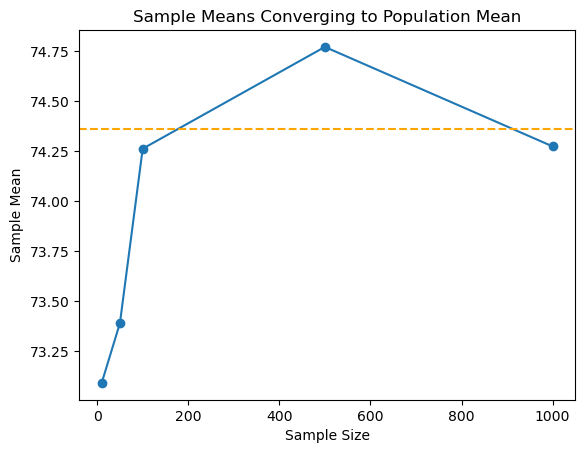

In [41]:
# Write your code here ...
pop = np.random.normal(loc=75, scale=10, size=1000)  # Large population with mean=50, std=10
sample_sizes = [10, 50, 100, 500, 1000]
sample_means = [np.random.choice(pop, size=n).mean() for n in sample_sizes]
plt.plot(sample_sizes, sample_means, marker='o')
plt.axhline(y=np.mean(pop), color='orange', linestyle='--')  # Population mean line
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.title('Sample Means Converging to Population Mean')
plt.show()

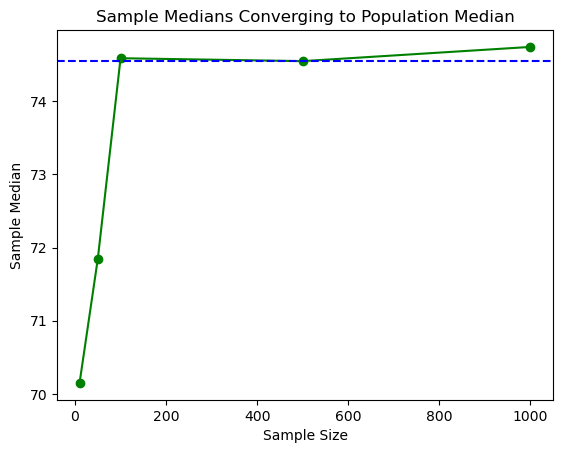

In [42]:
sample_medians = [np.median(np.random.choice(pop, size=n)) for n in sample_sizes]
plt.plot(sample_sizes, sample_medians, marker='o', color='green')
plt.axhline(y=np.median(pop), color='blue', linestyle='--')  # Population median line
plt.xlabel('Sample Size')
plt.ylabel('Sample Median')
plt.title('Sample Medians Converging to Population Median')
plt.show()  

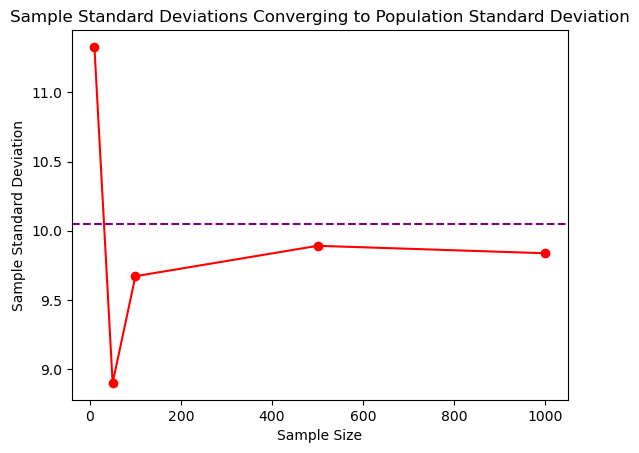

In [43]:
sample_std = [np.std(np.random.choice(pop, size=n)) for n in sample_sizes]
plt.plot(sample_sizes, sample_std, marker='o', color='red')
plt.axhline(y=np.std(pop), color='purple', linestyle='--')  # Population std dev line
plt.xlabel('Sample Size')
plt.ylabel('Sample Standard Deviation')
plt.title('Sample Standard Deviations Converging to Population Standard Deviation')
plt.show()  

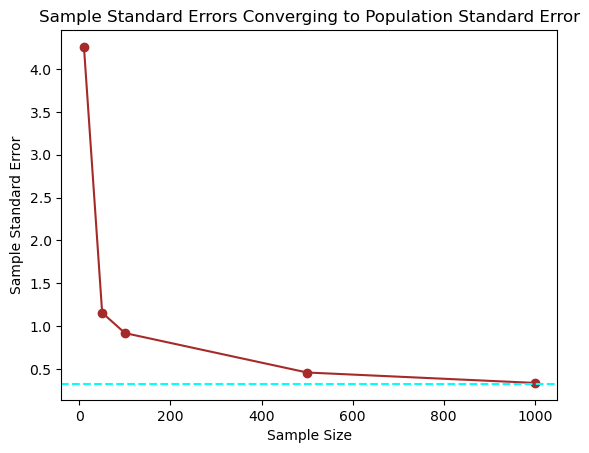

In [44]:
sample_se = [st.sem(np.random.choice(pop, size=n)) for n in sample_sizes]
plt.plot(sample_sizes, sample_se, marker='o', color='brown')
plt.axhline(y=st.sem(pop, ddof=0), color='cyan', linestyle='--')  # Population standard error line
plt.xlabel('Sample Size')
plt.ylabel('Sample Standard Error')
plt.title('Sample Standard Errors Converging to Population Standard Error')
plt.show()

# Extra Reference (Self-Study)
The following topics extend your understanding of this chapter. Explore them independantly to strengthen your skills and confidence.

## Quantiles
The median, which divides a distribution in two at its midpoint, is the most well-known example of a quantile:

In [112]:
np.median(x)

0.6987365121323832

In [113]:
np.quantile(x, 0.5)

0.6987365121323832

Generally speaking, quantiles divide up distributions and the most common are:

* Percentiles, 
* Quartiles, and
* Deciles.

### Percentiles
Divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [114]:
# Find the 95th and 99th percentile values
# 95th percentile: 95% of data falls below this value (top 5% is above)
# 99th percentile: 99% of data falls below this value (top 1% is above)
# Useful for identifying outliers and extreme values

p = np.percentile(x, [95, 99])
p

array([2.06249928, 2.51830108])

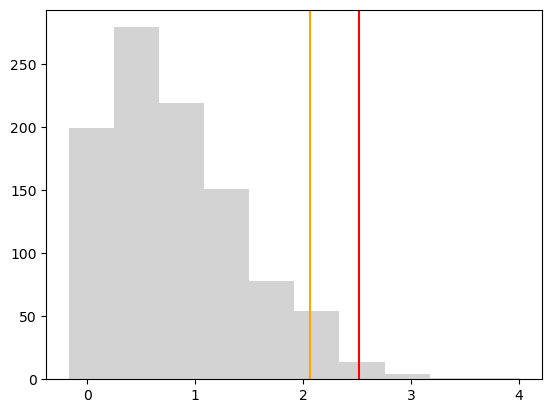

In [115]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

Note that the Numpy `quantile()` method is identical to the `percentile()` method except we pass proportions (ranging from zero to one) into the former and percentages (ranging from zero to 100) into the latter: 

In [116]:
# quantile() is identical to percentile() but uses proportions (0-1) instead of percentages (0-100)
# 0.95 = 95th percentile, 0.99 = 99th percentile
# Same results, just different input format

np.quantile(x, [.95, .99])

array([2.06249928, 2.51830108])

### Quartiles
As their name suggests, are quantiles that divide a distribution into quarters by splitting the distribution at the 25th percentile, the median (a.k.a. the 50th percentile), and the 75th percentile: 

In [117]:
# Quartiles divide data into four equal parts
# Q1 (25th percentile): 25% of data below, 75% above
# Q2 (50th percentile): The median - divides data in half
# Q3 (75th percentile): 75% of data below, 25% above
# The range between Q1 and Q3 is the "interquartile range" (IQR)

q = np.percentile(x, [25, 50, 75])
q

array([0.32494046, 0.69873651, 1.19431522])

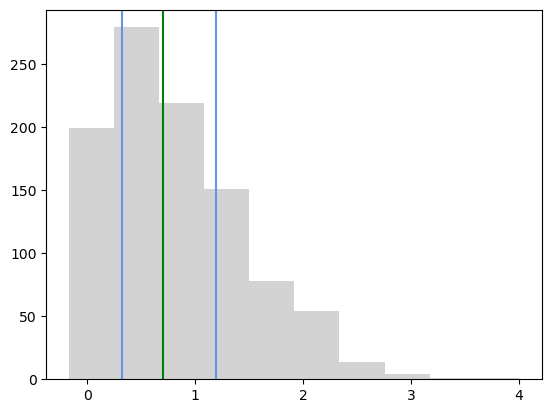

In [118]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

### Deciles
From Latin *decimus*, meaning "tenth", divide a distribution into ten evenly-sized segments: 

In [119]:
# Create list of decile percentages: [10, 20, 30, ..., 90]
# range(start, stop, step) generates numbers from 10 to 90 in steps of 10
# Deciles divide data into 10 equal parts (each containing 10% of data)

[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [120]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

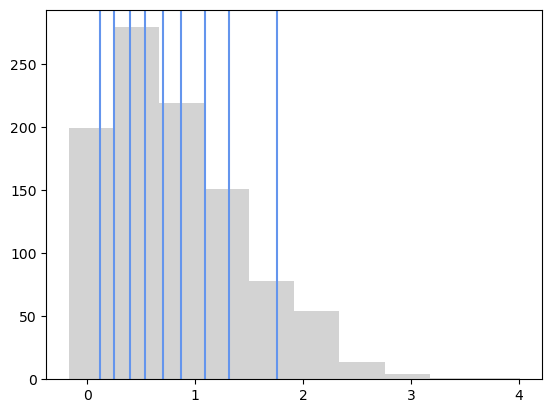

In [121]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')

As examples, we can refer to the bottom 10% as the bottom decile or the first decile, while the top 10% is the top decile or tenth decile.

## Measures of Relatedness
If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [122]:
# Load the famous iris flower dataset (built into seaborn)
# Contains measurements of 150 iris flowers across 3 species

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


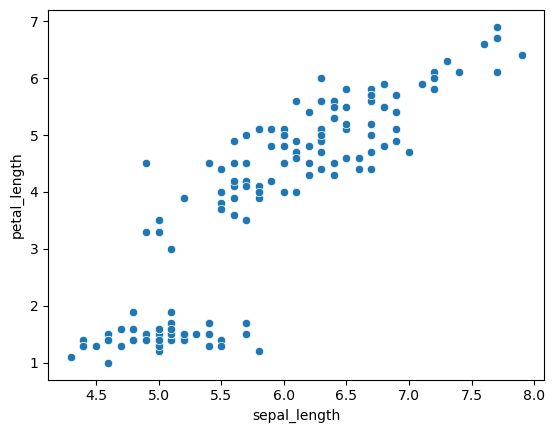

In [123]:
# Extract two variables to examine their relationship

x = iris.sepal_length  # Length of the sepal (protective leaf)
y = iris.petal_length  # Length of the petal (colorful part)

_ = sns.scatterplot(x=x, y=y)

The NumPy `cov()` method returns a **covariance matrix**, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space: 

In [124]:
# Calculate covariance matrix (2x2 matrix showing relationships)
# Off-diagonal elements [0,1] and [1,0]: covariance between x and y
# Diagonal elements [0,0] and [1,1]: variance of x and y respectively
# ddof=0 divides by n; ddof=1 divides by n-1 (default, for sample estimates)

np.cov(x, y, ddof=0)

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

The diagonal elements of the covariance matrix represent the variance of $x$ and $y$, respectively: 

In [125]:
# Verify: diagonal elements of covariance matrix equal the variances

np.var(x)  # Variance of sepal length (matches covariance matrix [0,0]

0.6811222222222222

In [126]:
np.var(y)  # Variance of petal length (matches covariance matrix [1,1])

3.0955026666666674

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero: 

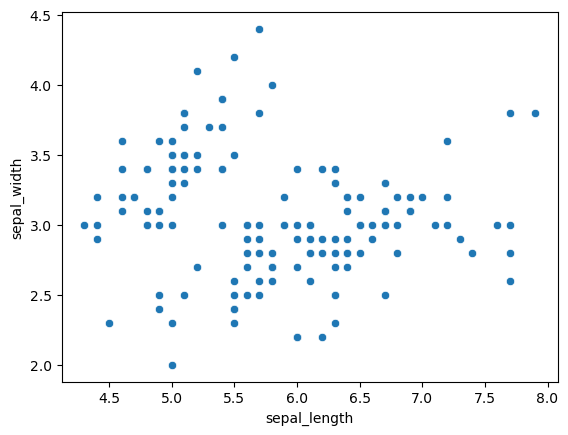

In [127]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [128]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

### Correlation
A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. **Correlation** builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [129]:
# Calculate Pearson correlation coefficient (r) and p-value
# r ranges from -1 to +1:
#   +1 = perfect positive correlation
#    0 = no linear correlation
#   -1 = perfect negative correlation
# p-value tests statistical significance (discussed in Stats section)

st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300204, pvalue=0.15189826071144746)

The second value output of `pearsonr` is a measure of statistical significance, which we'll detail in *Intro to Stats*. 

$\rho$ has a range of -1 to 1, with values closer to zero indicating less correlation: 

In [130]:
# Extract just the correlation coefficient (r-value)
# [0] gets first element of the returned tuple
# Negative value indicates inverse relationship: as one increases, other decreases

st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300204

The closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively: 

In [131]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865831

> Note: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.

### The Coefficient of Determination
Also known as $r^2$, this is the proportion of variance in one variable explained by another. 
It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [132]:
# Calculate R² (coefficient of determination) by squaring the correlation
# R² ranges from 0 to 1 and represents "proportion of variance explained"
# Example: R²=0.25 means 25% of variation in one variable explained by the other
# Commonly used in regression analysis to assess model fit

st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080698

### Correlation vs Causation
Correlation doesn't imply **causation** on its own. E.g., sepal length and petal length are extremely highly correlated, but this doesn't imply that sepal length causes petal length or vice versa. There is a lot to causality and I recommend Judea Pearl's [*Causality*](http://bayes.cs.ucla.edu/BOOK-2K/), the classic technical text on the topic, if you're keen to explore this in depth. [*The Book of Why*](http://bayes.cs.ucla.edu/WHY/) is an exceptional lay alternative by the same author.